In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
d1 = pd.read_csv("flipkart_product.csv", encoding="ISO-8859-1")
d1

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product
...,...,...,...,...,...
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Thanks
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Good
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Just wow!,Super
189872,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,4,Worth the money,Good


In [6]:
d1.shape

(189874, 5)

In [7]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189874 non-null  object
 1   Price        189873 non-null  object
 2   Rate         189873 non-null  object
 3   Review       189870 non-null  object
 4   Summary      189860 non-null  object
dtypes: object(5)
memory usage: 7.2+ MB


In [8]:
d1.dtypes

ProductName    object
Price          object
Rate           object
Review         object
Summary        object
dtype: object

In [9]:
import re

# Remove non-numeric characters, keep digits
d1['Price_Clean'] = d1['Price'].astype(str).apply(lambda x: re.sub(r'[^0-9]', '', x))

# Convert to numeric
d1['Price_Clean'] = pd.to_numeric(d1['Price_Clean'], errors='coerce')

# Drop rows where price not available
d1 = d1.dropna(subset=['Price_Clean'])


In [10]:
# Remove non-ASCII junk characters (like ? ? , \x etc.)
d1['ProductName'] = d1['ProductName'].astype(str).apply(
    lambda x: re.sub(r'[^\x00-\x7F]+',' ', x)  # remove weird chars
                .replace("?", " ")             # replace stray question marks
                .replace("  ", " ")            # fix double spaces
                .strip()
)

# Preview cleaned names
print(d1['ProductName'].head(20))


0     Candes 12 L Room/Personal Air Cooler  (White, ...
1     Candes 12 L Room/Personal Air Cooler  (White, ...
2     Candes 12 L Room/Personal Air Cooler  (White, ...
3     Candes 12 L Room/Personal Air Cooler  (White, ...
4     Candes 12 L Room/Personal Air Cooler  (White, ...
5     Candes 12 L Room/Personal Air Cooler  (White, ...
6     Candes 12 L Room/Personal Air Cooler  (White, ...
7     Candes 12 L Room/Personal Air Cooler  (White, ...
8     Candes 12 L Room/Personal Air Cooler  (White, ...
9     Candes 12 L Room/Personal Air Cooler  (White, ...
10    Candes 60 L Room/Personal Air Cooler  (White, ...
11    Candes 60 L Room/Personal Air Cooler  (White, ...
12    Candes 60 L Room/Personal Air Cooler  (White, ...
13    Candes 60 L Room/Personal Air Cooler  (White, ...
14    Candes 60 L Room/Personal Air Cooler  (White, ...
15    Candes 60 L Room/Personal Air Cooler  (White, ...
16    Candes 60 L Room/Personal Air Cooler  (White, ...
17    Candes 60 L Room/Personal Air Cooler  (Whi

C:\Users\Piyush\AppData\Local\Temp\ipykernel_21784\3496862290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['ProductName'] = d1['ProductName'].astype(str).apply(


In [11]:
d1 = d1.drop(columns=['Price'])


In [12]:

# First check current datatypes
print(d1.dtypes)

# Clean 'Rate' → convert to integer
d1['Rate'] = pd.to_numeric(d1['Rate'], errors='coerce').astype(float)

# Clean 'Price_Clean' → ensure float
d1['Price_Clean'] = pd.to_numeric(d1['Price_Clean'], errors='coerce').astype(float)


# Final datatypes check
print(d1.dtypes)


ProductName     object
Rate            object
Review          object
Summary         object
Price_Clean    float64
dtype: object
ProductName     object
Rate           float64
Review          object
Summary         object
Price_Clean    float64
dtype: object


In [13]:
d1

,ProductName,Rate,Review,Summary,Price_Clean
0,"Candes 12 L Room/Personal Air Cooler (White, ...",5.0,Super!,Great cooler.. excellent air flow and for this...,3999.0
1,"Candes 12 L Room/Personal Air Cooler (White, ...",5.0,Awesome,Best budget 2 fit cooler. Nice cooling,3999.0
2,"Candes 12 L Room/Personal Air Cooler (White, ...",3.0,Fair,The quality is good but the power of air is de...,3999.0
3,"Candes 12 L Room/Personal Air Cooler (White, ...",1.0,Useless product,Very bad product it's a only a fan,3999.0
4,"Candes 12 L Room/Personal Air Cooler (White, ...",3.0,Fair,Ok ok product,3999.0
...,...,...,...,...,...
189868,"NIVEA Soft Light Moisturizer for Face, Hand & ...",5.0,Terrific,Good,142.0
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",5.0,Terrific,Thanks,142.0
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",5.0,Terrific,Good,142.0
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",5.0,Just wow!,Super,142.0


In [14]:
import re
import pandas as pd

def clean_review(text):
    text = str(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove emojis
    emoji_pattern = re.compile(
        "["  
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        "]+",
        flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Convert to lower-case
    text = text.lower()

    return text

# Apply cleaning
d1["clean_review"] = d1["Review"].apply(clean_review)

d1.head()


,ProductName,Rate,Review,Summary,Price_Clean,clean_review
0,"Candes 12 L Room/Personal Air Cooler (White, ...",5.0,Super!,Great cooler.. excellent air flow and for this...,3999.0,super
1,"Candes 12 L Room/Personal Air Cooler (White, ...",5.0,Awesome,Best budget 2 fit cooler. Nice cooling,3999.0,awesome
2,"Candes 12 L Room/Personal Air Cooler (White, ...",3.0,Fair,The quality is good but the power of air is de...,3999.0,fair
3,"Candes 12 L Room/Personal Air Cooler (White, ...",1.0,Useless product,Very bad product it's a only a fan,3999.0,useless product
4,"Candes 12 L Room/Personal Air Cooler (White, ...",3.0,Fair,Ok ok product,3999.0,fair


In [15]:
d1=d1.drop(columns=['Review'])

In [16]:
d1["target"] = d1["Rate"].apply(lambda x: 1 if x >= 4 else 0)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(max_features=50000, ngram_range=(1,2))
X = tfidf.fit_transform(d1["clean_review"])

clf = LogisticRegression(max_iter=300)
clf.fit(X, d1["target"])


LogisticRegression(max_iter=300)

In [18]:
preds = clf.predict(tfidf.transform(d1["clean_review"]))
d1["Sentiment"] = preds
d1["Sentiment"] = d1["Sentiment"].map({1:"positive", 0:"negative"})


C:\Users\Piyush\AppData\Local\Temp\ipykernel_21784\3190417529.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=d1, x="Sentiment", palette="coolwarm")


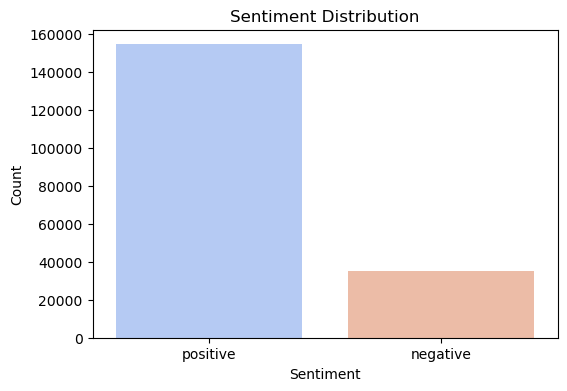

In [19]:

plt.figure(figsize=(6,4))
sns.countplot(data=d1, x="Sentiment", palette="coolwarm")

plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

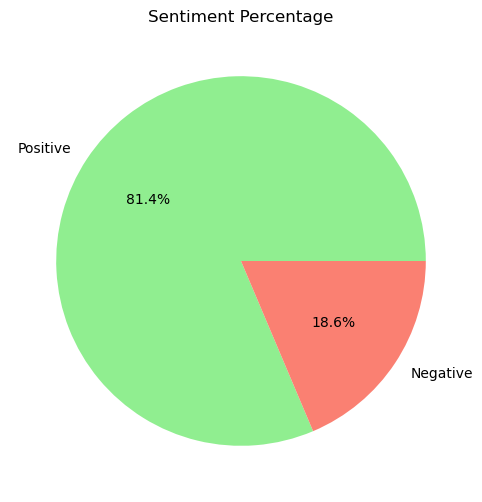

In [20]:
d1["Sentiment"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    colors=['lightgreen','salmon'],
    labels=["Positive","Negative"]
)

plt.title("Sentiment Percentage")
plt.ylabel("")
plt.show()


C:\Users\Piyush\AppData\Local\Temp\ipykernel_21784\3213326737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=d1, x="Sentiment", y="Rate", palette="viridis")


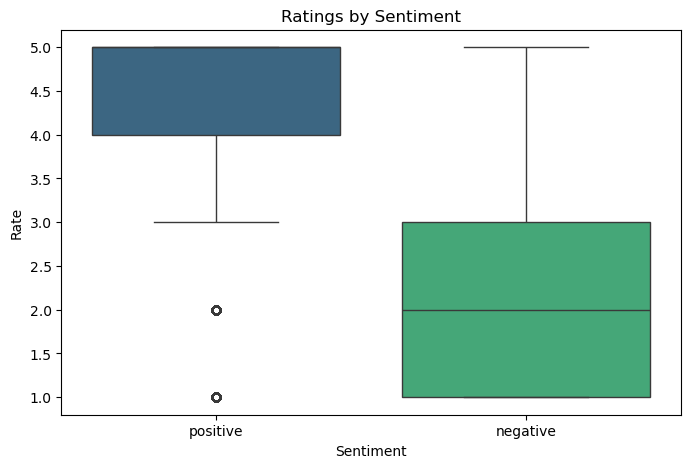

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(data=d1, x="Sentiment", y="Rate", palette="viridis")

plt.title("Ratings by Sentiment")
plt.show()


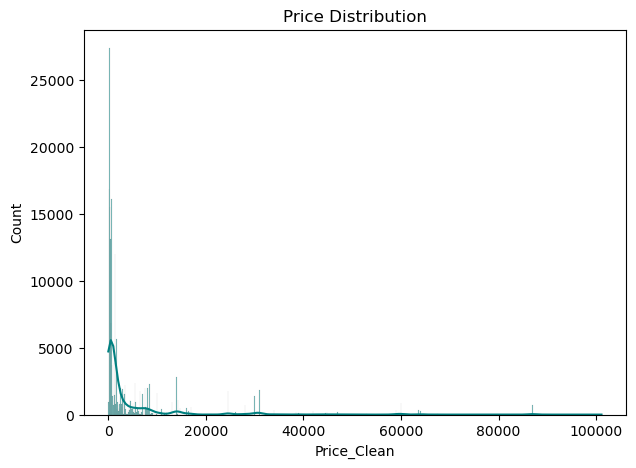

In [22]:
plt.figure(figsize=(7,5))
sns.histplot(d1["Price_Clean"], kde=True, color="teal")
plt.title("Price Distribution")
plt.show()


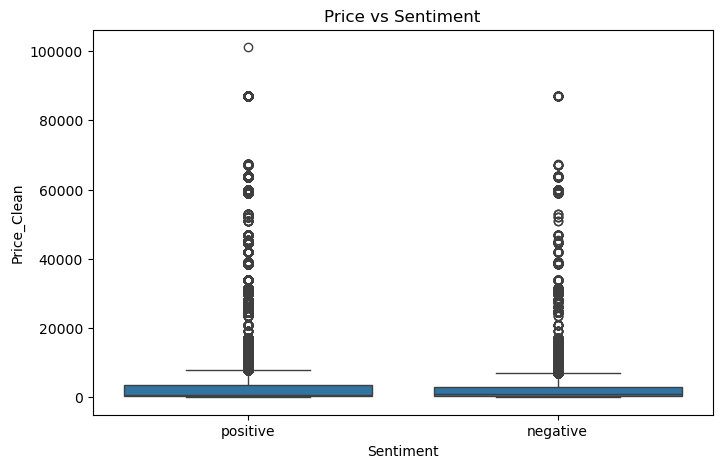

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(data=d1, x="Sentiment", y="Price_Clean")
plt.title("Price vs Sentiment")
plt.show()


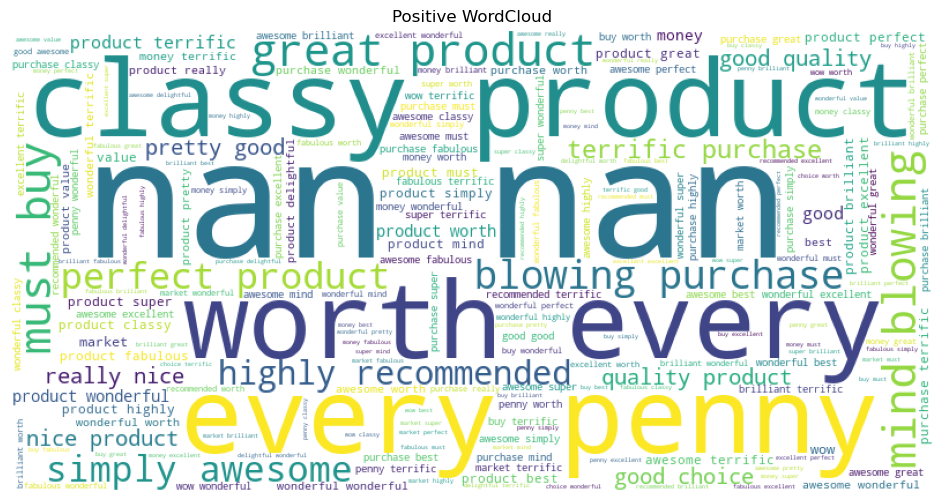

In [24]:
from wordcloud import WordCloud

positive_text = " ".join(d1[d1["Sentiment"]=="positive"]["clean_review"])

wc = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.title("Positive WordCloud")
plt.axis("off")
plt.show()


In [25]:
d1

,ProductName,Rate,Summary,Price_Clean,clean_review,target,Sentiment
0,"Candes 12 L Room/Personal Air Cooler (White, ...",5.0,Great cooler.. excellent air flow and for this...,3999.0,super,1,positive
1,"Candes 12 L Room/Personal Air Cooler (White, ...",5.0,Best budget 2 fit cooler. Nice cooling,3999.0,awesome,1,positive
2,"Candes 12 L Room/Personal Air Cooler (White, ...",3.0,The quality is good but the power of air is de...,3999.0,fair,0,negative
3,"Candes 12 L Room/Personal Air Cooler (White, ...",1.0,Very bad product it's a only a fan,3999.0,useless product,0,negative
4,"Candes 12 L Room/Personal Air Cooler (White, ...",3.0,Ok ok product,3999.0,fair,0,negative
...,...,...,...,...,...,...,...
189868,"NIVEA Soft Light Moisturizer for Face, Hand & ...",5.0,Good,142.0,terrific,1,positive
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",5.0,Thanks,142.0,terrific,1,positive
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",5.0,Good,142.0,terrific,1,positive
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",5.0,Super,142.0,just wow,1,positive


In [26]:
from sklearn.model_selection import train_test_split
X = d1["clean_review"].values
y = d1["Sentiment"].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [29]:
pipe_svm = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,3), max_features=60000, sublinear_tf=True)),
    ("clf", LinearSVC(C=2.0, class_weight="balanced"))
])

# Logistic Regression pipeline
pipe_logreg = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,3), max_features=60000, sublinear_tf=True)),
    ("clf", LogisticRegression(max_iter=300, class_weight="balanced"))
])

# Ensemble
ensemble = VotingClassifier(estimators=[
    ('svm', pipe_svm),
    ('lr', pipe_logreg)
], voting="hard")

In [30]:
ensemble.fit(X_train, y_train)

C:\Users\Piyush\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


VotingClassifier(estimators=[('svm',
                              Pipeline(steps=[('tfidf',
                                               TfidfVectorizer(max_features=60000,
                                                               ngram_range=(1,
                                                                            3),
                                                               sublinear_tf=True)),
                                              ('clf',
                                               LinearSVC(C=2.0,
                                                         class_weight='balanced'))])),
                             ('lr',
                              Pipeline(steps=[('tfidf',
                                               TfidfVectorizer(max_features=60000,
                                                               ngram_range=(1,
                                                                            3),
                                                               sublinear_tf=True)),
                                              ('clf',
                                               LogisticRegression(class_weight='balanced',
                                                                  max_iter=300))]))])

In [31]:
from sklearn.metrics import classification_report


In [32]:
preds = ensemble.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Accuracy: 0.9991046741277156
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      7071
    positive       1.00      1.00      1.00     30904

    accuracy                           1.00     37975
   macro avg       1.00      1.00      1.00     37975
weighted avg       1.00      1.00      1.00     37975



In [33]:
pipe_svm.fit(X_train, y_train)
preds = pipe_svm.predict(X_test)

C:\Users\Piyush\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [34]:

from sklearn.metrics import classification_report, accuracy_score

In [35]:
print("Binary SVM Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Binary SVM Accuracy: 0.999526003949967
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      7071
    positive       1.00      1.00      1.00     30904

    accuracy                           1.00     37975
   macro avg       1.00      1.00      1.00     37975
weighted avg       1.00      1.00      1.00     37975



In [36]:
print("Binary SVM Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Binary SVM Accuracy: 0.999526003949967
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      7071
    positive       1.00      1.00      1.00     30904

    accuracy                           1.00     37975
   macro avg       1.00      1.00      1.00     37975
weighted avg       1.00      1.00      1.00     37975



In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
max_words = 50000
max_len = 60
tok = Tokenizer(num_words=max_words, oov_token="<OOV>")
tok.fit_on_texts(X_train)

In [39]:
X_train_pad = pad_sequences(tok.texts_to_sequences(X_train), maxlen=max_len, padding="post")
X_test_pad  = pad_sequences(tok.texts_to_sequences(X_test),  maxlen=max_len, padding="post")

In [40]:
# Encode labels
y_train_bin = np.where(y_train == "Positive", 1, 0)
y_test_bin  = np.where(y_test == "Positive", 1, 0)

In [41]:
# BiLSTM Model
model = Sequential([
    Embedding(input_dim=min(max_words, len(tok.word_index)+1), output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

C:\Users\Piyush\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [42]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
es = EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)

In [43]:
history = model.fit(
    X_train_pad, y_train_bin,
    validation_split=0.2,
    epochs=10,
    batch_size=38,
    callbacks=[es],
    verbose=1
)

Epoch 1/10
3198/3198 ━━━━━━━━━━━━━━━━━━━━ 134s 40ms/step - accuracy: 0.9998 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 1.8776e-11
Epoch 2/10
3198/3198 ━━━━━━━━━━━━━━━━━━━━ 127s 40ms/step - accuracy: 1.0000 - loss: 3.2414e-07 - val_accuracy: 1.0000 - val_loss: 1.4512e-13
Epoch 3/10
3198/3198 ━━━━━━━━━━━━━━━━━━━━ 139s 43ms/step - accuracy: 1.0000 - loss: 5.2850e-08 - val_accuracy: 1.0000 - val_loss: 4.1856e-15
Epoch 4/10
3198/3198 ━━━━━━━━━━━━━━━━━━━━ 139s 42ms/step - accuracy: 1.0000 - loss: 3.6462e-08 - val_accuracy: 1.0000 - val_loss: 1.1844e-18


In [91]:
print("\n[DL] BiLSTM Test Accuracy:", model.evaluate(X_test_pad, y_test_bin, verbose=0)[1])


[DL] BiLSTM Test Accuracy: 1.0


In [92]:
samples = [
    "This Alexa device is amazing, I use it every day!",
    "The sound quality is terrible and it stopped working after a week.",
    "It’s okay, not the best but works fine."
]

preds = ensemble.predict(samples)
for text, label in zip(samples, preds):
    print(f"Review: {text}\nPredicted Sentiment: {label}\n")
    

Review: This Alexa device is amazing, I use it every day!
Predicted Sentiment: positive

Review: The sound quality is terrible and it stopped working after a week.
Predicted Sentiment: negative

Review: It’s okay, not the best but works fine.
Predicted Sentiment: negative



In [103]:
sample = ["The product is useless, I regret buying it."]

# Clean and tokenize
sample_clean = [clean_text(s) for s in sample]

sample_seq = pad_sequences(
    tok.texts_to_sequences(sample_clean),
    maxlen=max_len,
    padding="post"
)

pred = model.predict(sample_seq)[0][0]
sentiment = "Positive" if pred >= 0.5 else "Negative"

print(f"Review: {sample[0]}")
print(f"Predicted Sentiment: {sentiment} (score={pred:.3f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
Review: The product is useless, I regret buying it.
Predicted Sentiment: Negative (score=0.000)


In [105]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [107]:
import os
import pickle


texts = ["sample text one", "sample text two"]  # Replace with your real data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)

# --- 1. Choose a folder for artifacts ---
BASE_DIR = os.getcwd()                     # Current notebook folder
ARTIFACT_DIR = os.path.join(BASE_DIR, "artifacts")
os.makedirs(ARTIFACT_DIR, exist_ok=True)   # Create folder if it doesn’t exist

# --- 2. Paths for saving ---
MODEL_PATH = os.path.join(ARTIFACT_DIR, "model.h5")
TOKENIZER_PATH = os.path.join(ARTIFACT_DIR, "tokenizer.pkl")

# --- 3. Save model ---
model.save(MODEL_PATH)

# --- 4. Save tokenizer ---
with open(TOKENIZER_PATH, "wb") as f:
    pickle.dump(tokenizer, f)

print(f"Model saved at: {MODEL_PATH}")
print(f"Tokenizer saved at: {TOKENIZER_PATH}")

Model saved at: C:\Users\Piyush\personal projects\Chatbot\artifacts\model.h5
Tokenizer saved at: C:\Users\Piyush\personal projects\Chatbot\artifacts\tokenizer.pkl


In [109]:
from tensorflow.keras.models import load_model
import pickle
import os

# Paths
BASE_DIR = os.getcwd()
ARTIFACT_DIR = os.path.join(BASE_DIR, "artifacts")
MODEL_PATH = os.path.join(ARTIFACT_DIR, "model.h5")
TOKENIZER_PATH = os.path.join(ARTIFACT_DIR, "tokenizer.pkl")

# Load model
model = load_model(MODEL_PATH)

# Load tokenizer
with open(TOKENIZER_PATH, "rb") as f:
    tokenizer = pickle.load(f)

print("Model and tokenizer loaded successfully!")

Model and tokenizer loaded successfully!
